In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sns.set_context('poster', font_scale=1.25)

We are solving

$$\frac{df}{dt}=-(\vec{v}\cdot \nabla)f + D \nabla^2 f + sf(1-f)$$

in two dimensions.

In [5]:
from adr_2d.solver import Solver

In [6]:
import skimage as ski
import skimage.io

In [7]:
import time

In [22]:
sol = Solver(imax=100, jmax=100, kmax=1000, use_morton=False)

Creating initial gaussian condition...
Done!
Creating advection operator...
Done!
Creating diffusion operator...
Done!


In [23]:
np.int32

numpy.int32

It takes *soooooo* long to make these operators...bleh. Let's see if we can speed it up...if we want to do it right, we really have to initialize the elements in a more intelligent manner...

In [25]:
sol.kmax=500

In [26]:
result = sol.run()

I'm so confused. Why does this start sucking.

In [27]:
crap = np.where(result < 0)

In [28]:
ruh_roh_1 = crap[0]

Ok yeah there are problems lol.

In [29]:
ruh_rohs = np.where(result < 0)[0]

In [30]:
result.min()

-0.27604762337862465

Interesting. So instabilities are certainly growing...but not exploding...maybe it is an instability. Maybe I need more grid points???

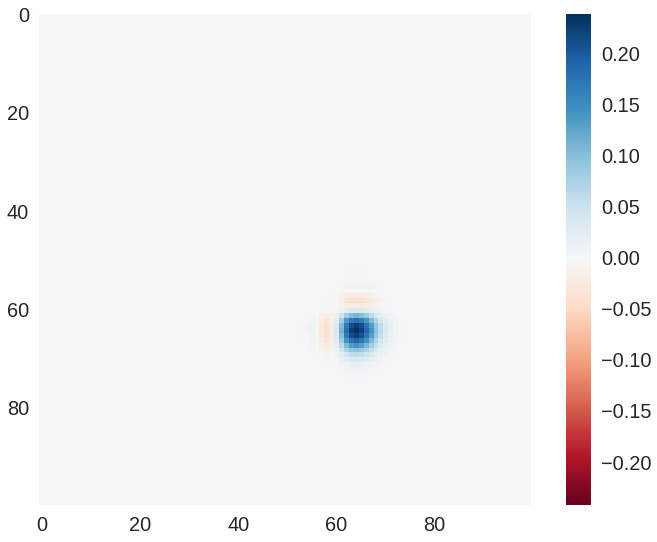

In [31]:
ski.io.imshow(result[:, :, 300])
plt.grid(False)
#plt.clim([-.1, 0])

wtf lol. It's more important that I debug this error first...why are things no longer looping appropriately as well?

Somehow, advection is screwing things up. Because diffusion looks beautiful.